In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = io.loadmat('data/data.mat')
print(type(dataset))

<class 'dict'>


In [3]:
plt.imshow(X_train[13], cmap='gray')
# plt.show()data = np.squeeze(dataset['Data'])
print(data.shape)
print(data[0].shape)
print(data[-1].shape)

(60000,)
(27, 20)
(35, 25)


In [4]:
labels = np.squeeze(dataset['labels'])
print(labels.shape)
print(labels[1])
print(labels[-1])

(60000,)
5
6


In [5]:
X_train_orginal = data[:50000]
print(X_train_orginal.shape)
y_train = labels[:50000]
print(y_train.shape)
X_test_orginal = data[50000:]
print(X_test_orginal.shape)
y_test = labels[50000:]
print(y_test.shape)

(50000,)
(50000,)
(10000,)
(10000,)


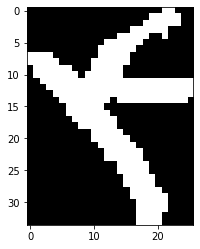

4


In [6]:
plt.imshow(X_train_orginal[23], cmap='gray')
plt.show()
print(y_train[23])

In [7]:
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by5 = [resize(img, (5, 5)) for img in X_test_orginal]
print(X_train_5by5[0].shape)

(5, 5)


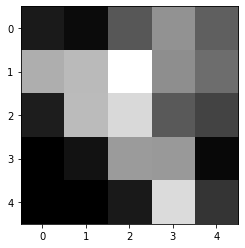

4


In [8]:
plt.imshow(X_train_5by5[23], cmap='gray')
plt.show()
print(y_train[23])

In [9]:
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by5]
print(X_train[0].shape)

(25,)


In [10]:
def load_hoda_digits(training_sample_size=50000, testing_sample_size=10000, size=10):
    dataset = io.loadmat('data/data.mat')
    data = np.squeeze(dataset['Data'])
    labels = np.squeeze(dataset['labels'])
    X_train_orginal = data[:training_sample_size]
    y_train = labels[:training_sample_size]
    X_test_orginal = data[60000-testing_sample_size:]
    y_test = labels[60000-testing_sample_size:]
    X_train_size_by_size = [resize(img, (size, size)) for img in X_train_orginal]
    X_test_size_by_size = [resize(img, (size, size)) for img in X_test_orginal]
    X_train = [x.reshape(size*size) for x in X_train_size_by_size]
    X_test = [x.reshape(size*size) for x in X_test_size_by_size]
    return X_train, y_train, X_test, y_test

In [11]:
X_train, y_train, X_test, y_test = load_hoda_digits()

In [12]:
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=10)

In [13]:
k_neighbors_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [14]:
print(k_neighbors_classifier.predict(X_test[23].reshape(1, -1)), y_test[23])

[6] 6


In [15]:
print(k_neighbors_classifier.predict_proba(X_test[23].reshape(1, -1)))

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [16]:
y_pred = k_neighbors_classifier.predict(X_test)
print(len(y_pred))

10000


In [18]:
acc = k_neighbors_classifier.score(X_test, y_test)
print(acc * 100)

98.45
